## This code defines the necessary functions to find which parking functions are (or are not) expressed given a graph. 

____________________________________________________________________________________________________________

### Inquiry: 
>* given a pentagon (or hexagon), which PFs are or are not included 
>* are they related? 
>* how many are there?
____________________________________________________________________________________________________________
### Some Defintions:
1. Shape0 always defines the cycle graph of a shape
2. Shape1 defines the triangulation graph of the shape with all possible triangulation edges coming out of vertex 1 (this follows for other vertices/graphs with similar names)
3. Shape_test represents a shape with 1 inner edge (typically defined in the comments/code) for the sake of comparison to shapes that share that inner edge but also have others
____________________________________________________________________________________________________________

## Defining Necessary Functions:

In [5]:
# from ipynb.fs.full.test import ordered_cycle_decomps
# ordered_cycle_decomps(5)

In [6]:
def Bond_Lattice(g, n):
    ''' Creates a bond lattice for a given graph 
    params: g = a graph over n vertices
            n = the number of vertices
    return: A Bond Lattice for the set partitions of n elements'''
    
    partitions = SetPartitions(n).list() #find all set partitions 
    
    bad_partitions = [] #create lists to document partitions to include in the bond lattice or to leave out
    good_partitions = []
    
    for partition in partitions: #looking at each partition indvidually
        good_partition = True #automatically assume it creates a connected subgraph (innocent until proven guilty)

        for block in partition: #look at a block of the partition                
            new_graph = g.subgraph(vertices = block) #create an induced subgraph of the block
            good_partition = new_graph.is_connected() #ask whether the subgraph of the partition is connected
            if good_partition == False: #if its not connected...
                bad_partitions.append(partition) #add it to the list of bad partitions
                break #stop looking at this partition
            
        if good_partition: #if the induced subgraph of every block are all connected...
            good_partitions.append(partition) #add it to the list of good partitions
        
    return posets.SetPartitions(n).subposet(good_partitions) #return a poset of only the good partitions

# from Developed_Functions import Bond_Lattice


In [7]:
def maximal_chains(BL):
    '''Gives the number of maximal chains of a bond lattice.
    Input: BL = the bond lattice
    Return: the number of maximal chains in the lattice'''
    return len(BL.maximal_chains())

In [8]:
def stanleys_bijection(BL):
    '''Computes Stanley's bijection on a noncrossing Bond Lattice
    input: a Bond Lattice of noncrossing partitions
    return: a list of all parking functions provided via Stanleys Bijection'''
    all_pfs = []
    chains = BL.maximal_chains()
    for chain in chains:
        parking_func = get_parking_function(chain)
        all_pfs.append(parking_func)
    return all_pfs

def get_parking_function(chain):
    '''Computes the parking function for a given maximal chain
    input: maximal noncrossing chain of a poset
    return: the parking function of the given chain'''
    chain_length = len(chain)
    parking_function = []
    for index in range(0, chain_length - 1):
        x1 = 0
        x2 = 0
        for block in chain[index]:
            if block not in chain[index+1]: 
                if x1 == 0: 
                    x1 = block
                else:
                    x2 = block
        if min(x1) < min(x2):
            smaller = x1
            bigger = x2
        else:
            smaller = x2  
            bigger = x1
        parking_pref = 0
        for element in smaller:
            if element < min(bigger):
                if element > parking_pref:
                    parking_pref = element
        parking_function.append(parking_pref)
    return list(parking_function)

In [9]:
def in_common(list1, list2):
    commonalities = []
    for elem in list1:
        if elem in list2:
            commonalities.append(elem)
    return commonalities

In [10]:
from sage.combinat.parking_functions import ParkingFunctions
def pfs_not_included(pfs_of_triangulation, n):
    '''Identifies all parking functions not found from the maximal chains of a Bond Lattice
    input: the parking functions given by stanleys bijection and their length
    return: the list of classical parking functions excluded from the bond lattice'''
    not_included = []
    all_pfs = ParkingFunctions(n).list()
    for i in range(len(all_pfs)):
        all_pfs[i] = list(all_pfs[i]) #to account for data type incompatability
    for pf in all_pfs:
        if pf not in pfs_of_triangulation:
            not_included.append(pf)
    return not_included

In [11]:
def noncrossing_partitions(n):
    '''Creates poset of noncrossing partitions on n
    input: the value to partition
    return: a subposet of the poset of all partitions on n with only noncrossing partitions'''
    NC = []
    all_n = posets.SetPartitions(n)
    for partition in all_n:
        if partition.is_noncrossing():
            NC.append(partition)
    return posets.SetPartitions(n).subposet(NC)

____________________________________________________________________________________________________________
## Building the Pentagons:

In [12]:
#pentagon with no edges:
pentagon0 = Graph()
pentagon0.add_edge(1,2)
pentagon0.add_edge(2,3)
pentagon0.add_edge(3,4)
pentagon0.add_edge(4,5)
pentagon0.add_edge(5,1)


pentagon0.set_pos(pentagon0.layout_circular()) #adjusting so .plot() looks correct
pent0_bond = Bond_Lattice(pentagon0, 5) #creating the bond lattice
pent0_pfs = stanleys_bijection(pent0_bond) #getting the parking functions from the bond lattice
missing0 = pfs_not_included(pent0_pfs, 4) #identifying missing parking functions

#pentagon with 2 edges coming out of 1
pentagon1 = Graph()
pentagon1.add_edge(1,2)
pentagon1.add_edge(2,3)
pentagon1.add_edge(3,4)
pentagon1.add_edge(4,5)
pentagon1.add_edge(5,1)

pentagon1.add_edge(1,3)
pentagon1.add_edge(1,4)

pentagon1.set_pos(pentagon1.layout_circular())
pent1_bond = Bond_Lattice(pentagon1, 5)
pent1_pfs = stanleys_bijection(pent1_bond)
missing1 = pfs_not_included(pent1_pfs, 4)

#pentagon with 2 edges coming out of 2
pentagon2 = Graph()
pentagon2.add_edge(1,2)
pentagon2.add_edge(2,3)
pentagon2.add_edge(3,4)
pentagon2.add_edge(4,5)
pentagon2.add_edge(5,1)

pentagon2.add_edge(2,5)
pentagon2.add_edge(2,4)

pentagon2.set_pos(pentagon2.layout_circular())
pent2_bond = Bond_Lattice(pentagon2, 5)
pent2_pfs = stanleys_bijection(pent2_bond)
missing2 = pfs_not_included(pent2_pfs, 4)

#pentagon with 2 edges coming out of 3
pentagon3 = Graph()
pentagon3.add_edge(1,2)
pentagon3.add_edge(2,3)
pentagon3.add_edge(3,4)
pentagon3.add_edge(4,5)
pentagon3.add_edge(5,1)

pentagon3.add_edge(3,5)
pentagon3.add_edge(1,3)

pentagon3.set_pos(pentagon3.layout_circular())
pent3_bond = Bond_Lattice(pentagon3, 5)
pent3_pfs = stanleys_bijection(pent3_bond)
missing3 = pfs_not_included(pent3_pfs, 4)

#pentagon with 2 edges coming out of 4
pentagon4 = Graph()
pentagon4.add_edge(1,2)
pentagon4.add_edge(2,3)
pentagon4.add_edge(3,4)
pentagon4.add_edge(4,5)
pentagon4.add_edge(5,1)

pentagon4.add_edge(4,2)
pentagon4.add_edge(1,4)

pentagon4.set_pos(pentagon4.layout_circular())
pent4_bond = Bond_Lattice(pentagon4, 5)
pent4_pfs = stanleys_bijection(pent4_bond)
missing4 = pfs_not_included(pent4_pfs, 4)

#pentagon with 2 edges coming out of 5
pentagon5 = Graph()
pentagon5.add_edge(1,2)
pentagon5.add_edge(2,3)
pentagon5.add_edge(3,4)
pentagon5.add_edge(4,5)
pentagon5.add_edge(5,1)

pentagon5.add_edge(3,5)
pentagon5.add_edge(5,2)

pentagon5.set_pos(pentagon5.layout_circular())
pent5_bond = Bond_Lattice(pentagon5, 5)
pent5_pfs = stanleys_bijection(pent5_bond)
missing5 = pfs_not_included(pent5_pfs, 4)

#will this provide the same number of pf's beyond the 60 from the outline that happen
# when you just have the single edge + the pentagon?

#test: pentagon with only 35 inner edge
test1 = Graph()
test1.add_edge(1,2)
test1.add_edge(2,3)
test1.add_edge(3,4)
test1.add_edge(4,5)
test1.add_edge(5,1)

test1.add_edge(3,5)

test1.set_pos(test1.layout_circular())
test1_bond = Bond_Lattice(test1, 5)
test1_pfs = stanleys_bijection(test1_bond)
test1_missing = pfs_not_included(test1_pfs, 4)

#test: pentagon with only 14 inner edge
test2 = Graph()
test2.add_edge(1,2)
test2.add_edge(2,3)
test2.add_edge(3,4)
test2.add_edge(4,5)
test2.add_edge(5,1)

test2.add_edge(1,4)

test2.set_pos(test2.layout_circular())
test2_bond = Bond_Lattice(test2, 5)
test2_pfs = stanleys_bijection(test2_bond)
test2_missing = pfs_not_included(test2_pfs, 4)

# len(test2_pfs) - 60

__________________________________________________________________________________________________
## Pentagon Testing:

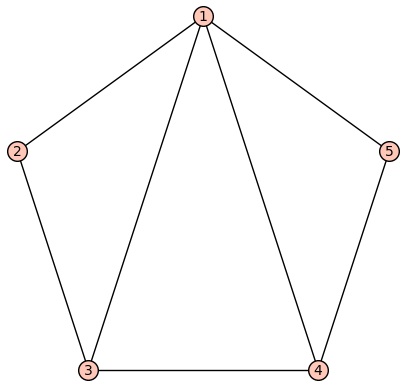

In [13]:
pentagon1.plot()

In [14]:
# pent1_bond.plot(figsize=(15,15))

In [15]:
maximal_chains(pent1_bond)

88

In [16]:
# number of elements in the bond lattice:
pent1_bond.cardinality()

34

In [17]:
#creating the noncrossing set partitions of 5:
NC5 = noncrossing_partitions(5)

In [18]:
#pent1 excluded pfs and the maximal chains they come from:
NC5_poset_max_chains = NC5_poset.maximal_chains()
pent1_max_chains = pent1_bond.maximal_chains()

for chain in NC5_poset_max_chains:
    if chain not in pent1_max_chains:
        print(chain,get_parking_function(chain))
        print()

NameError: name 'NC5_poset' is not defined

In [ ]:
#included parking functions in pentagon1 and the maximal chains they come from:
pent1_max_chains = pent1_bond.maximal_chains()
for chain in pent1_max_chains:
    print(chain,get_parking_function(chain))
    print()

In [ ]:
all_4_pfs = ParkingFunctions(4).list()

In [19]:
pent0_max_chains = pent0_bond.maximal_chains()
for chain in pent0_max_chains:
    print(chain,get_parking_function(chain))
    print()

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1, 2}, {3}, {4, 5}}, {{1, 2, 4, 5}, {3}}, {{1, 2, 3, 4, 5}}] [4, 1, 2, 2]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1, 2}, {3}, {4, 5}}, {{1, 2}, {3, 4, 5}}, {{1, 2, 3, 4, 5}}] [4, 1, 3, 2]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1, 2}, {3}, {4, 5}}, {{1, 2, 3}, {4, 5}}, {{1, 2, 3, 4, 5}}] [4, 1, 2, 3]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1}, {2}, {3, 4, 5}}, {{1, 2}, {3, 4, 5}}, {{1, 2, 3, 4, 5}}] [4, 3, 1, 2]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1}, {2}, {3, 4, 5}}, {{1, 3, 4, 5}, {2}}, {{1, 2, 3, 4, 5}}] [4, 3, 1, 1]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1}, {2}, {3, 4, 5}}, {{1}, {2, 3, 4, 5}}, {{1, 2, 3, 4, 5}}] [4, 3, 2, 1]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1}, {2, 3}, {4, 5}}, {{1, 4, 5}, {2, 3}}, {{1, 2, 3, 4, 5}}] [4, 2, 1, 1]

[{{1}, {2}, {3}, {4}, {5}}, {{1}, {2}, {3}, {4, 5}}, {{1}, {2, 3}, {4, 5}}, {{1, 2, 3}, {4

In [262]:
len(pent1_pfs)

88

In [263]:
missing4 

[[1, 1, 1, 3],
 [1, 1, 3, 1],
 [1, 1, 3, 3],
 [1, 3, 1, 3],
 [1, 3, 3, 1],
 [3, 1, 1, 3],
 [3, 1, 3, 1],
 [3, 3, 1, 1],
 [1, 1, 3, 4],
 [1, 1, 4, 3],
 [1, 3, 1, 4],
 [1, 3, 4, 1],
 [1, 4, 1, 3],
 [1, 4, 3, 1],
 [4, 1, 1, 3],
 [4, 1, 3, 1],
 [2, 1, 2, 2],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [2, 1, 2, 3],
 [2, 1, 3, 2],
 [2, 2, 1, 3],
 [2, 2, 3, 1],
 [2, 3, 1, 2],
 [2, 3, 2, 1],
 [3, 2, 1, 2],
 [3, 2, 2, 1],
 [1, 3, 2, 3],
 [1, 3, 3, 2],
 [2, 3, 1, 3],
 [2, 3, 3, 1],
 [3, 1, 2, 3],
 [3, 1, 3, 2],
 [3, 2, 1, 3],
 [3, 2, 3, 1],
 [3, 3, 1, 2],
 [3, 3, 2, 1]]

In [264]:
in_common(missing1, missing2)

[[3, 1, 1, 3],
 [3, 1, 3, 1],
 [3, 3, 1, 1],
 [1, 3, 2, 3],
 [1, 3, 3, 2],
 [3, 1, 2, 3],
 [3, 1, 3, 2],
 [3, 2, 1, 3],
 [3, 2, 3, 1],
 [3, 3, 1, 2],
 [3, 3, 2, 1]]

In [265]:
ParkingFunctions(4).list()

[[1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 1, 2, 1],
 [1, 2, 1, 1],
 [2, 1, 1, 1],
 [1, 1, 1, 3],
 [1, 1, 3, 1],
 [1, 3, 1, 1],
 [3, 1, 1, 1],
 [1, 1, 1, 4],
 [1, 1, 4, 1],
 [1, 4, 1, 1],
 [4, 1, 1, 1],
 [1, 1, 2, 2],
 [1, 2, 1, 2],
 [1, 2, 2, 1],
 [2, 1, 1, 2],
 [2, 1, 2, 1],
 [2, 2, 1, 1],
 [1, 1, 2, 3],
 [1, 1, 3, 2],
 [1, 2, 1, 3],
 [1, 2, 3, 1],
 [1, 3, 1, 2],
 [1, 3, 2, 1],
 [2, 1, 1, 3],
 [2, 1, 3, 1],
 [2, 3, 1, 1],
 [3, 1, 1, 2],
 [3, 1, 2, 1],
 [3, 2, 1, 1],
 [1, 1, 2, 4],
 [1, 1, 4, 2],
 [1, 2, 1, 4],
 [1, 2, 4, 1],
 [1, 4, 1, 2],
 [1, 4, 2, 1],
 [2, 1, 1, 4],
 [2, 1, 4, 1],
 [2, 4, 1, 1],
 [4, 1, 1, 2],
 [4, 1, 2, 1],
 [4, 2, 1, 1],
 [1, 1, 3, 3],
 [1, 3, 1, 3],
 [1, 3, 3, 1],
 [3, 1, 1, 3],
 [3, 1, 3, 1],
 [3, 3, 1, 1],
 [1, 1, 3, 4],
 [1, 1, 4, 3],
 [1, 3, 1, 4],
 [1, 3, 4, 1],
 [1, 4, 1, 3],
 [1, 4, 3, 1],
 [3, 1, 1, 4],
 [3, 1, 4, 1],
 [3, 4, 1, 1],
 [4, 1, 1, 3],
 [4, 1, 3, 1],
 [4, 3, 1, 1],
 [1, 2, 2, 2],
 [2, 1, 2, 2],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [1, 2, 2, 3],
 [1, 2, 3,

In [266]:
#intersections:
[x for x in missing1 if x in missing2]

[[3, 1, 1, 3],
 [3, 1, 3, 1],
 [3, 3, 1, 1],
 [1, 3, 2, 3],
 [1, 3, 3, 2],
 [3, 1, 2, 3],
 [3, 1, 3, 2],
 [3, 2, 1, 3],
 [3, 2, 3, 1],
 [3, 3, 1, 2],
 [3, 3, 2, 1]]

In [267]:
[x for x in missing1 if x in missing3]

[[1, 2, 1, 2],
 [1, 2, 2, 1],
 [2, 1, 1, 2],
 [2, 1, 2, 1],
 [2, 2, 1, 1],
 [2, 1, 2, 2],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [2, 1, 2, 3],
 [2, 1, 3, 2],
 [2, 2, 1, 3],
 [2, 2, 3, 1],
 [2, 3, 1, 2],
 [2, 3, 2, 1],
 [3, 2, 1, 2],
 [3, 2, 2, 1],
 [2, 1, 2, 4],
 [2, 1, 4, 2],
 [2, 2, 1, 4],
 [2, 2, 4, 1],
 [2, 4, 1, 2],
 [2, 4, 2, 1],
 [4, 2, 1, 2],
 [4, 2, 2, 1]]

In [268]:
[x for x in missing5 if x in missing3 and x in missing2]

[[1, 1, 1, 4],
 [1, 1, 4, 1],
 [1, 4, 1, 1],
 [1, 1, 2, 4],
 [1, 1, 4, 2],
 [1, 2, 1, 4],
 [1, 2, 4, 1],
 [1, 4, 1, 2],
 [1, 4, 2, 1],
 [2, 1, 1, 4],
 [2, 1, 4, 1]]

In [269]:
[x for x in missing3 if x in missing2]

[[1, 1, 1, 4],
 [1, 1, 4, 1],
 [1, 4, 1, 1],
 [1, 1, 2, 4],
 [1, 1, 4, 2],
 [1, 2, 1, 4],
 [1, 2, 4, 1],
 [1, 4, 1, 2],
 [1, 4, 2, 1],
 [2, 1, 1, 4],
 [2, 1, 4, 1]]

In [270]:
[x for x in missing1 if x in missing4]

[[3, 1, 1, 3],
 [3, 1, 3, 1],
 [3, 3, 1, 1],
 [2, 1, 2, 2],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [2, 1, 2, 3],
 [2, 1, 3, 2],
 [2, 2, 1, 3],
 [2, 2, 3, 1],
 [2, 3, 1, 2],
 [2, 3, 2, 1],
 [3, 2, 1, 2],
 [3, 2, 2, 1],
 [1, 3, 2, 3],
 [1, 3, 3, 2],
 [2, 3, 1, 3],
 [2, 3, 3, 1],
 [3, 1, 2, 3],
 [3, 1, 3, 2],
 [3, 2, 1, 3],
 [3, 2, 3, 1],
 [3, 3, 1, 2],
 [3, 3, 2, 1]]

In [271]:
[x for x in missing1 if x in missing5]

[[1, 2, 1, 2],
 [1, 2, 2, 1],
 [2, 1, 1, 2],
 [2, 1, 2, 1],
 [2, 2, 1, 1],
 [2, 1, 2, 4],
 [2, 1, 4, 2],
 [2, 2, 1, 4],
 [2, 2, 4, 1],
 [2, 4, 1, 2],
 [2, 4, 2, 1]]

In [272]:
[x for x in missing1 if x in missing5 and x in missing4]

[]

In [273]:
[x for x in missing4 if x in missing5]

[[1, 1, 3, 3],
 [1, 3, 1, 3],
 [1, 3, 3, 1],
 [1, 1, 3, 4],
 [1, 1, 4, 3],
 [1, 3, 1, 4],
 [1, 3, 4, 1],
 [1, 4, 1, 3],
 [1, 4, 3, 1],
 [4, 1, 1, 3],
 [4, 1, 3, 1]]

In [274]:
[x for x in missing3 if x in missing4]

[[2, 1, 2, 2],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [2, 1, 2, 3],
 [2, 1, 3, 2],
 [2, 2, 1, 3],
 [2, 2, 3, 1],
 [2, 3, 1, 2],
 [2, 3, 2, 1],
 [3, 2, 1, 2],
 [3, 2, 2, 1]]

In [275]:
pent5_pfs

[[4, 3, 1, 2],
 [4, 3, 2, 1],
 [4, 3, 1, 1],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [4, 2, 1, 1],
 [4, 2, 1, 2],
 [4, 2, 2, 1],
 [4, 1, 3, 2],
 [4, 1, 2, 3],
 [4, 1, 2, 2],
 [4, 1, 1, 2],
 [4, 1, 1, 1],
 [4, 1, 2, 1],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [3, 4, 1, 1],
 [3, 2, 1, 1],
 [3, 2, 4, 1],
 [3, 2, 1, 4],
 [3, 2, 1, 2],
 [3, 2, 2, 1],
 [3, 1, 4, 2],
 [3, 1, 2, 2],
 [3, 1, 2, 4],
 [3, 1, 2, 1],
 [3, 1, 1, 2],
 [3, 1, 1, 1],
 [3, 1, 3, 2],
 [3, 1, 2, 3],
 [3, 2, 3, 1],
 [3, 2, 1, 3],
 [3, 3, 1, 2],
 [3, 3, 2, 1],
 [3, 3, 1, 1],
 [3, 1, 3, 1],
 [3, 1, 1, 3],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [2, 4, 1, 1],
 [2, 3, 1, 1],
 [2, 3, 4, 1],
 [2, 3, 1, 4],
 [2, 3, 3, 1],
 [2, 3, 1, 3],
 [2, 1, 4, 3],
 [2, 1, 3, 4],
 [2, 1, 3, 3],
 [2, 1, 3, 1],
 [2, 1, 1, 3],
 [2, 1, 1, 1],
 [2, 2, 3, 1],
 [2, 2, 1, 3],
 [2, 2, 1, 2],
 [2, 2, 2, 1],
 [2, 3, 1, 2],
 [2, 3, 2, 1],
 [2, 1, 2, 2],
 [2, 1, 3, 2],
 [2, 1, 2, 3],
 [1, 4, 3, 2],
 [1, 4, 2, 3],
 [1, 4, 2, 2],
 [1, 3, 4, 2],
 [1, 3, 2, 2],
 [1, 3, 2, 4],
 [1, 3, 3,

In [276]:
all_in_common = [x for x in pent0_pfs if x in pent1_pfs and x in pent1_pfs and x in pent3_pfs and x in pent4_pfs and x in pent5_pfs]

In [277]:
len(all_in_common)

60

In [278]:
all_in_common

[[4, 1, 2, 2],
 [4, 1, 3, 2],
 [4, 1, 2, 3],
 [4, 3, 1, 2],
 [4, 3, 1, 1],
 [4, 3, 2, 1],
 [4, 2, 1, 1],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [4, 1, 2, 1],
 [4, 1, 1, 2],
 [4, 1, 1, 1],
 [3, 1, 2, 1],
 [3, 1, 1, 2],
 [3, 1, 1, 1],
 [3, 1, 4, 2],
 [3, 1, 2, 2],
 [3, 1, 2, 4],
 [3, 4, 1, 2],
 [3, 4, 1, 1],
 [3, 4, 2, 1],
 [3, 2, 1, 1],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [2, 1, 4, 3],
 [2, 1, 3, 4],
 [2, 1, 3, 3],
 [2, 4, 1, 1],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [2, 3, 1, 1],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [2, 1, 1, 1],
 [2, 1, 3, 1],
 [2, 1, 1, 3],
 [1, 2, 2, 2],
 [1, 2, 3, 2],
 [1, 2, 2, 3],
 [1, 4, 2, 2],
 [1, 4, 3, 2],
 [1, 4, 2, 3],
 [1, 3, 4, 2],
 [1, 3, 2, 2],
 [1, 3, 2, 4],
 [1, 2, 4, 3],
 [1, 2, 3, 4],
 [1, 2, 3, 3],
 [1, 1, 2, 2],
 [1, 1, 3, 2],
 [1, 1, 2, 3],
 [1, 1, 2, 1],
 [1, 1, 1, 2],
 [1, 1, 1, 1],
 [1, 3, 2, 1],
 [1, 3, 1, 2],
 [1, 3, 1, 1],
 [1, 2, 1, 1],
 [1, 2, 3, 1],
 [1, 2, 1, 3]]

In [279]:
extra_1 = [x for x in pent1_pfs if x not in pent0_pfs]

In [280]:
extra_2 = [x for x in pent2_pfs if x not in pent0_pfs]

In [281]:
extra_3 = [x for x in pent3_pfs if x not in pent0_pfs]

In [282]:
extra_4 = [x for x in pent4_pfs if x not in pent0_pfs]

In [283]:
extra_5 = [x for x in pent5_pfs if x not in pent0_pfs]

In [284]:
extra_1, extra_2, extra_3, extra_4, extra_5

([[4, 1, 3, 1],
  [4, 1, 1, 3],
  [3, 1, 1, 4],
  [3, 1, 4, 1],
  [2, 1, 1, 4],
  [2, 1, 4, 1],
  [1, 2, 4, 2],
  [1, 2, 2, 4],
  [1, 3, 1, 4],
  [1, 3, 4, 1],
  [1, 1, 3, 4],
  [1, 1, 3, 3],
  [1, 1, 4, 3],
  [1, 4, 3, 1],
  [1, 4, 1, 3],
  [1, 3, 3, 1],
  [1, 3, 1, 3],
  [1, 4, 1, 2],
  [1, 4, 1, 1],
  [1, 4, 2, 1],
  [1, 1, 4, 2],
  [1, 1, 2, 4],
  [1, 1, 1, 4],
  [1, 1, 4, 1],
  [1, 2, 1, 4],
  [1, 2, 4, 1],
  [1, 1, 3, 1],
  [1, 1, 1, 3]],
 [[4, 2, 2, 1],
  [4, 2, 1, 2],
  [3, 2, 1, 2],
  [3, 2, 2, 1],
  [2, 3, 3, 1],
  [2, 3, 1, 3],
  [2, 4, 2, 1],
  [2, 4, 1, 2],
  [2, 1, 2, 4],
  [2, 1, 4, 2],
  [2, 1, 2, 1],
  [2, 1, 1, 2],
  [2, 2, 1, 1],
  [2, 2, 4, 1],
  [2, 2, 1, 4],
  [2, 2, 3, 1],
  [2, 2, 1, 3],
  [2, 2, 2, 1],
  [2, 2, 1, 2],
  [2, 3, 1, 2],
  [2, 3, 2, 1],
  [2, 1, 3, 2],
  [2, 1, 2, 3],
  [2, 1, 2, 2],
  [1, 2, 2, 4],
  [1, 2, 4, 2],
  [1, 2, 2, 1],
  [1, 2, 1, 2]],
 [[4, 1, 1, 3],
  [4, 1, 3, 1],
  [3, 1, 1, 4],
  [3, 1, 4, 1],
  [3, 2, 3, 1],
  [3, 2, 1, 3],
  [3, 

In [285]:
[x for x in extra_1 if x in extra_4]
# pentagon 1 and 4 both have the 14 edge, beyond the pfs created by the outline of the shape,
# this 14 edge creates 15 shared pfs between the two of them.
# does this hold for any 2 shapes with a shared triangulation edge?

[[3, 1, 1, 4],
 [3, 1, 4, 1],
 [2, 1, 1, 4],
 [2, 1, 4, 1],
 [1, 2, 4, 2],
 [1, 2, 2, 4],
 [1, 4, 1, 2],
 [1, 4, 1, 1],
 [1, 4, 2, 1],
 [1, 1, 4, 2],
 [1, 1, 2, 4],
 [1, 1, 1, 4],
 [1, 1, 4, 1],
 [1, 2, 1, 4],
 [1, 2, 4, 1]]

In [286]:
[x for x in extra_3 if x in extra_5]

[[3, 2, 3, 1],
 [3, 2, 1, 3],
 [3, 3, 2, 1],
 [3, 3, 1, 1],
 [3, 3, 1, 2],
 [3, 1, 3, 2],
 [3, 1, 2, 3],
 [3, 1, 3, 1],
 [3, 1, 1, 3],
 [2, 3, 3, 1],
 [2, 3, 1, 3],
 [1, 3, 3, 2],
 [1, 3, 2, 3],
 [1, 1, 3, 1],
 [1, 1, 1, 3]]

In [287]:
[x for x in test1_pfs if x not in pent0_pfs]

[[3, 2, 3, 1],
 [3, 2, 1, 3],
 [3, 1, 3, 1],
 [3, 1, 1, 3],
 [3, 3, 2, 1],
 [3, 3, 1, 2],
 [3, 3, 1, 1],
 [3, 1, 2, 3],
 [3, 1, 3, 2],
 [2, 3, 3, 1],
 [2, 3, 1, 3],
 [1, 3, 2, 3],
 [1, 3, 3, 2],
 [1, 1, 3, 1],
 [1, 1, 1, 3]]

In [288]:
#what about for a square? this gives us the number of pfs given by a square with no inner edges
# c4_bond = Bond_Lattice(c4, 4)
# c4_pfs = stanleys_bijection(c4_bond, 4)
# c4_missing = pfs_not_included(c4_pfs, 3)


# len(c4_pfs)
# = 12! --> when you add an edge you get 2 more pf's 

____________________________________________________________________________________________________________
## Building the Hexagons:

In [289]:
#what about n = 6
#how many triangulation graphs of a hexagon are there? 42? (catalan number)
# 9 individual inner edges to add (q: how many additional pfs do we get if we just add 1?)

#the base hexagon
hexagon0  = Graph()
hexagon0.add_edge(1,2)
hexagon0.add_edge(2,3)
hexagon0.add_edge(3,4)
hexagon0.add_edge(4,5)
hexagon0.add_edge(5,6)
hexagon0.add_edge(1,6)

hexagon0_bond = Bond_Lattice(hexagon0, 6)
hexagon0_pfs = stanleys_bijection(hexagon0_bond)

#the hexagon with 3 triangulation edges coming out of 1
hexagon1 = Graph()
hexagon1.add_edge(1,2)
hexagon1.add_edge(2,3)
hexagon1.add_edge(3,4)
hexagon1.add_edge(4,5)
hexagon1.add_edge(5,6)
hexagon1.add_edge(1,6)

hexagon1.add_edge(1,5)
hexagon1.add_edge(1,4)
hexagon1.add_edge(1,3)

hexagon1.set_pos(hexagon1.layout_circular())
hexagon1_bond = Bond_Lattice(hexagon1, 6)
hexagon1_pfs = stanleys_bijection(hexagon1_bond)
# hexagon1_missing = pfs_not_included(hexagon1_pfs, 5)

#the hexagon with 1 triangulation edge coming out of 1
hexagon1_test  = Graph()
hexagon1_test.add_edge(1,2)
hexagon1_test.add_edge(2,3)
hexagon1_test.add_edge(3,4)
hexagon1_test.add_edge(4,5)
hexagon1_test.add_edge(5,6)
hexagon1_test.add_edge(1,6)

hexagon1_test.add_edge(1,4)

hexagon1_test_bond = Bond_Lattice(hexagon1_test, 6)
hexagon1_test_pfs = stanleys_bijection(hexagon1_test_bond)

#the hexagon with 3 triangulation edges coming out of 3
hexagon3 = Graph()
hexagon3.add_edge(1,2)
hexagon3.add_edge(2,3)
hexagon3.add_edge(3,4)
hexagon3.add_edge(4,5)
hexagon3.add_edge(5,6)
hexagon3.add_edge(1,6)

hexagon3.add_edge(3,5)
hexagon3.add_edge(1,3)
hexagon3.add_edge(3,6)

hexagon3.set_pos(hexagon3.layout_circular())
hexagon3_bond = Bond_Lattice(hexagon3, 6)
hexagon3_pfs = stanleys_bijection(hexagon3_bond)


#the hexagon with 1 triangulation edge coming out of 2 going to 5 (does not create a triangle)
hexagon3_test  = Graph()
hexagon3_test.add_edge(1,2)
hexagon3_test.add_edge(2,3)
hexagon3_test.add_edge(3,4)
hexagon3_test.add_edge(4,5)
hexagon3_test.add_edge(5,6)
hexagon3_test.add_edge(1,6)

hexagon3_test.add_edge(2,5)

hexagon3_test_bond = Bond_Lattice(hexagon3_test, 6)
hexagon3_test_pfs = stanleys_bijection(hexagon3_test_bond)

#the hexagon with 3 triangulation edges coming out of 2
hexagon2 = Graph()
hexagon2.add_edge(1,2)
hexagon2.add_edge(2,3)
hexagon2.add_edge(3,4)
hexagon2.add_edge(4,5)
hexagon2.add_edge(5,6)
hexagon2.add_edge(1,6)

hexagon2.add_edge(2,5)
hexagon2.add_edge(2,4)
hexagon2.add_edge(2,6)

hexagon2.set_pos(hexagon2.layout_circular())
hexagon2_bond = Bond_Lattice(hexagon2, 6)
hexagon2_pfs = stanleys_bijection(hexagon2_bond)

#the hexagon with 3 triangulation edges coming out of 5
hexagon5 = Graph()
hexagon5.add_edge(1,2)
hexagon5.add_edge(2,3)
hexagon5.add_edge(3,4)
hexagon5.add_edge(4,5)
hexagon5.add_edge(5,6)
hexagon5.add_edge(1,6)

hexagon5.add_edge(2,5)
hexagon5.add_edge(5,3)
hexagon5.add_edge(5,1)

hexagon5.set_pos(hexagon5.layout_circular())
hexagon5_bond = Bond_Lattice(hexagon5, 6)
hexagon5_pfs = stanleys_bijection(hexagon5_bond)


#the hexagon with 1 triangulation edge coming out of 2 going to 5 (does not create a triangle)
hexagon5_test  = Graph()
hexagon5_test.add_edge(1,2)
hexagon5_test.add_edge(2,3)
hexagon5_test.add_edge(3,4)
hexagon5_test.add_edge(4,5)
hexagon5_test.add_edge(5,6)
hexagon5_test.add_edge(1,6)

hexagon5_test.add_edge(2,5)

hexagon5_test_bond = Bond_Lattice(hexagon5_test, 6)
hexagon5_test_pfs = stanleys_bijection(hexagon5_test_bond)

#the hexagon with 3 triangulation edges coming out of 4
hexagon4 = Graph()
hexagon4.add_edge(1,2)
hexagon4.add_edge(2,3)
hexagon4.add_edge(3,4)
hexagon4.add_edge(4,5)
hexagon4.add_edge(5,6)
hexagon4.add_edge(1,6)

hexagon4.add_edge(1,4)
hexagon4.add_edge(6,4)
hexagon4.add_edge(2,4)

hexagon4.set_pos(hexagon4.layout_circular())
hexagon4_bond = Bond_Lattice(hexagon4, 6)
hexagon4_pfs = stanleys_bijection(hexagon4_bond)
# hexagon1_missing = pfs_not_included(hexagon1_pfs, 5)

#the hexagon with 3 triangulation edges coming out of 6
hexagon6 = Graph()
hexagon6.add_edge(1,2)
hexagon6.add_edge(2,3)
hexagon6.add_edge(3,4)
hexagon6.add_edge(4,5)
hexagon6.add_edge(5,6)
hexagon6.add_edge(1,6)

hexagon6.add_edge(3,6)
hexagon6.add_edge(6,4)
hexagon6.add_edge(2,6)

hexagon6.set_pos(hexagon6.layout_circular())
hexagon6_bond = Bond_Lattice(hexagon6, 6)
hexagon6_pfs = stanleys_bijection(hexagon6_bond)

#the hexagon with 1 triangulation edge coming out of 6 going to 4 (creates a triangle)
hexagon6_test  = Graph()
hexagon6_test.add_edge(1,2)
hexagon6_test.add_edge(2,3)
hexagon6_test.add_edge(3,4)
hexagon6_test.add_edge(4,5)
hexagon6_test.add_edge(5,6)
hexagon6_test.add_edge(1,6)

hexagon6_test.add_edge(6,4)

hexagon6_test_bond = Bond_Lattice(hexagon6_test, 6)
hexagon6_test_pfs = stanleys_bijection(hexagon6_test_bond)

____________________________________________________________________________________________________________
## Hexagon Testing:

In [290]:
print(len(hexagon0_pfs)) #360 starting pfs
print(len(hexagon1_pfs) - len(hexagon0_pfs)) #334 new pfs from 3 added edges 
                                             # (108 x 3 = 324--> 10 additional created by inner triangulations)
print(len(hexagon1_test_pfs) - len(hexagon0_pfs)) #144 new pfs from 1 added edge

360
334
144


In [291]:
len([x for x in hexagon1_pfs if x in hexagon4_pfs]) - 360

144

In [292]:
hex4_hex1_incomm = [x for x in hexagon1_pfs if x in hexagon4_pfs if x not in hexagon0_pfs]
added_1 = [x for x in hexagon1_test_pfs if x not in hexagon0_pfs]

In [293]:
added_1

[[5, 3, 1, 4, 1],
 [5, 3, 1, 1, 4],
 [5, 2, 1, 4, 1],
 [5, 2, 1, 1, 4],
 [5, 1, 2, 4, 2],
 [5, 1, 2, 2, 4],
 [5, 1, 1, 4, 2],
 [5, 1, 1, 2, 4],
 [5, 1, 1, 4, 1],
 [5, 1, 1, 1, 4],
 [5, 1, 4, 1, 2],
 [5, 1, 4, 1, 1],
 [5, 1, 4, 2, 1],
 [5, 1, 2, 4, 1],
 [5, 1, 2, 1, 4],
 [4, 1, 1, 1, 5],
 [4, 1, 1, 5, 1],
 [4, 1, 2, 1, 5],
 [4, 1, 2, 5, 1],
 [4, 1, 5, 1, 2],
 [4, 1, 5, 1, 1],
 [4, 1, 5, 2, 1],
 [4, 1, 1, 2, 5],
 [4, 1, 1, 5, 2],
 [4, 3, 1, 1, 5],
 [4, 3, 1, 5, 1],
 [4, 2, 1, 1, 5],
 [4, 2, 1, 5, 1],
 [4, 1, 2, 2, 5],
 [4, 1, 2, 5, 2],
 [3, 5, 1, 4, 1],
 [3, 5, 1, 1, 4],
 [3, 4, 1, 1, 5],
 [3, 4, 1, 5, 1],
 [3, 1, 1, 4, 1],
 [3, 1, 1, 1, 4],
 [3, 1, 4, 1, 5],
 [3, 1, 4, 5, 1],
 [3, 1, 5, 4, 1],
 [3, 1, 5, 1, 4],
 [3, 1, 1, 4, 5],
 [3, 1, 1, 5, 4],
 [3, 1, 1, 4, 4],
 [3, 1, 4, 4, 1],
 [3, 1, 4, 1, 4],
 [2, 1, 4, 1, 5],
 [2, 1, 4, 5, 1],
 [2, 1, 1, 4, 5],
 [2, 1, 1, 5, 4],
 [2, 1, 1, 4, 4],
 [2, 1, 5, 4, 1],
 [2, 1, 5, 1, 4],
 [2, 1, 4, 4, 1],
 [2, 1, 4, 1, 4],
 [2, 5, 1, 4, 1],
 [2, 5, 1,

In [294]:
len(hex4_hex1_incomm)

144

In [295]:
len(added_1)

144

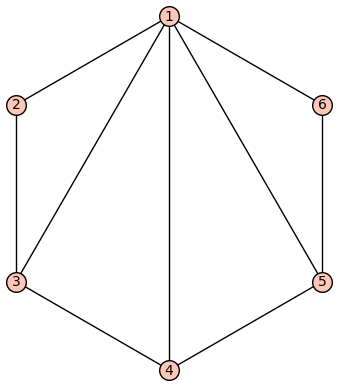

In [296]:
hexagon1.plot()

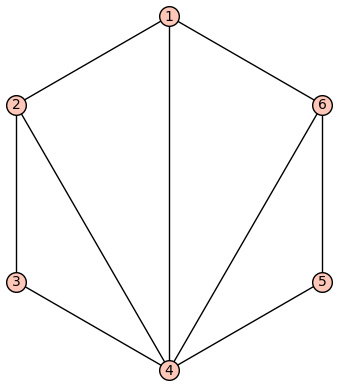

In [297]:
hexagon4.plot()

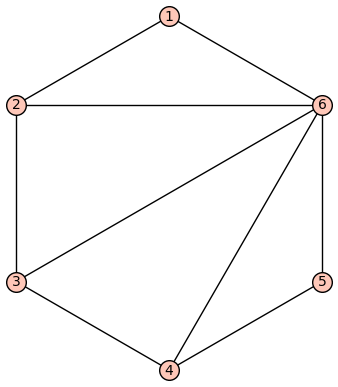

In [298]:
hexagon6.plot()

In [299]:
hex4_hex6_incomm = [x for x in hexagon6_pfs if x in hexagon4_pfs if x not in hexagon0_pfs]
added_1_64 = [x for x in hexagon6_test_pfs if x not in hexagon0_pfs]

In [300]:
len(hex4_hex6_incomm)

120

In [301]:
len(added_1_64)

108

In [302]:
hex2_hex5_incomm = [x for x in hexagon2_pfs if x in hexagon5_pfs if x not in hexagon0_pfs]
added_1_25 = [x for x in hexagon5_test_pfs if x not in hexagon0_pfs]

In [303]:
len(hex2_hex5_incomm)

144

In [304]:
len(added_1_25)

144

In [305]:
added_1_25

[[5, 4, 2, 1, 2],
 [5, 4, 2, 2, 1],
 [5, 3, 2, 1, 2],
 [5, 3, 2, 2, 1],
 [5, 2, 3, 1, 3],
 [5, 2, 3, 3, 1],
 [5, 2, 1, 2, 3],
 [5, 2, 1, 2, 2],
 [5, 2, 1, 3, 2],
 [5, 2, 2, 1, 3],
 [5, 2, 2, 3, 1],
 [5, 2, 2, 1, 2],
 [5, 2, 2, 2, 1],
 [5, 2, 3, 1, 2],
 [5, 2, 3, 2, 1],
 [4, 5, 2, 1, 2],
 [4, 5, 2, 2, 1],
 [4, 1, 2, 2, 1],
 [4, 1, 2, 1, 2],
 [4, 2, 1, 2, 5],
 [4, 2, 1, 5, 2],
 [4, 2, 2, 1, 1],
 [4, 2, 2, 1, 5],
 [4, 2, 2, 5, 1],
 [4, 2, 1, 2, 1],
 [4, 2, 1, 1, 2],
 [4, 2, 5, 1, 2],
 [4, 2, 5, 2, 1],
 [4, 1, 2, 2, 5],
 [4, 1, 2, 5, 2],
 [3, 5, 2, 1, 2],
 [3, 5, 2, 2, 1],
 [3, 2, 1, 2, 5],
 [3, 2, 1, 5, 2],
 [3, 2, 2, 1, 1],
 [3, 2, 2, 1, 5],
 [3, 2, 2, 5, 1],
 [3, 2, 5, 1, 2],
 [3, 2, 5, 2, 1],
 [3, 2, 1, 2, 1],
 [3, 2, 1, 1, 2],
 [3, 1, 2, 2, 1],
 [3, 1, 2, 1, 2],
 [3, 1, 2, 2, 5],
 [3, 1, 2, 5, 2],
 [2, 1, 3, 3, 5],
 [2, 1, 3, 5, 3],
 [2, 5, 3, 1, 3],
 [2, 5, 3, 3, 1],
 [2, 3, 3, 1, 1],
 [2, 3, 3, 1, 5],
 [2, 3, 3, 5, 1],
 [2, 3, 5, 1, 3],
 [2, 3, 5, 3, 1],
 [2, 3, 1, 3, 1],
 [2, 3, 1,

In [306]:
hex3_hex6_incomm = [x for x in hexagon3_pfs if x in hexagon6_pfs if x not in hexagon0_pfs]
added_1_36 = [x for x in hexagon3_test_pfs if x not in hexagon0_pfs]

In [307]:
len(hex3_hex6_incomm)

144

In [308]:
len(added_1_36)

144

In [309]:
added_1_36

[[5, 4, 2, 1, 2],
 [5, 4, 2, 2, 1],
 [5, 3, 2, 1, 2],
 [5, 3, 2, 2, 1],
 [5, 2, 3, 1, 3],
 [5, 2, 3, 3, 1],
 [5, 2, 1, 2, 3],
 [5, 2, 1, 2, 2],
 [5, 2, 1, 3, 2],
 [5, 2, 2, 1, 3],
 [5, 2, 2, 3, 1],
 [5, 2, 2, 1, 2],
 [5, 2, 2, 2, 1],
 [5, 2, 3, 1, 2],
 [5, 2, 3, 2, 1],
 [4, 5, 2, 1, 2],
 [4, 5, 2, 2, 1],
 [4, 1, 2, 2, 1],
 [4, 1, 2, 1, 2],
 [4, 2, 1, 2, 5],
 [4, 2, 1, 5, 2],
 [4, 2, 2, 1, 1],
 [4, 2, 2, 1, 5],
 [4, 2, 2, 5, 1],
 [4, 2, 1, 2, 1],
 [4, 2, 1, 1, 2],
 [4, 2, 5, 1, 2],
 [4, 2, 5, 2, 1],
 [4, 1, 2, 2, 5],
 [4, 1, 2, 5, 2],
 [3, 5, 2, 1, 2],
 [3, 5, 2, 2, 1],
 [3, 2, 1, 2, 5],
 [3, 2, 1, 5, 2],
 [3, 2, 2, 1, 1],
 [3, 2, 2, 1, 5],
 [3, 2, 2, 5, 1],
 [3, 2, 5, 1, 2],
 [3, 2, 5, 2, 1],
 [3, 2, 1, 2, 1],
 [3, 2, 1, 1, 2],
 [3, 1, 2, 2, 1],
 [3, 1, 2, 1, 2],
 [3, 1, 2, 2, 5],
 [3, 1, 2, 5, 2],
 [2, 1, 3, 3, 5],
 [2, 1, 3, 5, 3],
 [2, 5, 3, 1, 3],
 [2, 5, 3, 3, 1],
 [2, 3, 3, 1, 1],
 [2, 3, 3, 1, 5],
 [2, 3, 3, 5, 1],
 [2, 3, 5, 1, 3],
 [2, 3, 5, 3, 1],
 [2, 3, 1, 3, 1],
 [2, 3, 1,

In [310]:
in_common(hex3_hex6_incomm, added_1_36)

[[5, 2, 3, 3, 1], [5, 2, 3, 1, 3], [2, 5, 3, 3, 1], [2, 5, 3, 1, 3]]

In [311]:
hexagon0_pfs

[[5, 1, 2, 1, 3],
 [5, 1, 2, 1, 1],
 [5, 1, 2, 3, 1],
 [5, 1, 3, 1, 2],
 [5, 1, 3, 1, 1],
 [5, 1, 3, 2, 1],
 [5, 1, 1, 2, 3],
 [5, 1, 1, 3, 2],
 [5, 1, 1, 2, 2],
 [5, 1, 1, 2, 1],
 [5, 1, 1, 1, 1],
 [5, 1, 1, 1, 2],
 [5, 4, 1, 2, 3],
 [5, 4, 1, 2, 2],
 [5, 4, 1, 3, 2],
 [5, 4, 2, 1, 3],
 [5, 4, 2, 1, 1],
 [5, 4, 2, 3, 1],
 [5, 4, 1, 2, 1],
 [5, 4, 1, 1, 1],
 [5, 4, 1, 1, 2],
 [5, 4, 3, 1, 2],
 [5, 4, 3, 1, 1],
 [5, 4, 3, 2, 1],
 [5, 3, 1, 1, 2],
 [5, 3, 1, 1, 1],
 [5, 3, 1, 2, 1],
 [5, 3, 1, 2, 2],
 [5, 3, 1, 2, 4],
 [5, 3, 1, 4, 2],
 [5, 3, 2, 1, 1],
 [5, 3, 2, 1, 4],
 [5, 3, 2, 4, 1],
 [5, 3, 4, 1, 2],
 [5, 3, 4, 1, 1],
 [5, 3, 4, 2, 1],
 [5, 2, 1, 1, 3],
 [5, 2, 1, 1, 1],
 [5, 2, 1, 3, 1],
 [5, 2, 1, 3, 3],
 [5, 2, 1, 4, 3],
 [5, 2, 1, 3, 4],
 [5, 2, 4, 1, 3],
 [5, 2, 4, 1, 1],
 [5, 2, 4, 3, 1],
 [5, 2, 3, 1, 1],
 [5, 2, 3, 1, 4],
 [5, 2, 3, 4, 1],
 [5, 1, 2, 3, 3],
 [5, 1, 2, 4, 3],
 [5, 1, 2, 3, 4],
 [5, 1, 2, 2, 3],
 [5, 1, 2, 3, 2],
 [5, 1, 2, 2, 2],
 [5, 1, 4, 2, 3],
 [5, 1, 4,